In [68]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

This is a continuation of the energy burden project - final data obtained from our R analysis (see R markdown attached). R analysis was used to build an **explanatory** logistic regression model, which predicts whether a particular US county would have high (>4%) or low (<=4%) average energy burden.

Now, our goal is to build a **predictive machine learning model** and evaluate its performance. Since our data is at the county level and counties that are geographically close to each other share similar characteristics (e.g., energy burden), it seems fitting to use the kNN (k Nearest Neighbors) ML algorithm. 

In [59]:
# Save the data
energy3 = pd.read_csv('energy3.csv')

In [60]:
# Create binary response variable
energy3['energy_burden_response'] = ['1' if x == '>= 4%' else '0' for x in \
                                     energy3['energy_burden_greater_4']] 

In [61]:
# Preview
energy3.head(n = 15)

,Unnamed: 0,county_fips,county,state,county_pop,battery_electric_vehicles,hybrid_vehicles,plugin_hybrid_vehicles,internal_combustion_vehicles,energyburden_indicator,...,log_hybrid_vehicles,log_plugin_hybrid_vehicles,log_internal_combustion_vehicles,pct_unemployed,pct_mining_oil_gas,energy_burden_greater_4,fitted_probabilities,fitted_energy_burden_greater_4,logit_v1,energy_burden_response
0,1,1001,Autauga,AL,55200,151,619,37,47791,0.04583,...,2.791691,1.568202,4.679346,0.049,0.003548,< 4%,0.109285,0,-2.098070,0
1,2,1003,Baldwin,AL,208107,446,2591,189,167169,0.00000,...,3.413467,2.276462,5.223156,0.056,0.002576,< 4%,0.028991,0,-3.511360,0
2,3,1005,Barbour,AL,25782,40,286,17,20669,0.12222,...,2.456366,1.230449,4.315319,0.070,0.000000,>= 4%,0.714787,1,0.918749,1
3,4,1007,Bibb,AL,22527,28,132,12,17660,0.00000,...,2.120574,1.079181,4.246991,0.066,0.018958,>= 4%,0.429392,0,-0.284332,1
4,5,1009,Blount,AL,57645,72,454,31,50846,0.00000,...,2.657056,1.491362,4.706257,0.041,0.006342,>= 4%,0.110748,0,-2.083124,1
5,6,1011,Bullock,AL,10352,32,136,6,8471,0.18333,...,2.133539,0.778151,3.927935,0.055,0.000000,>= 4%,0.592096,1,0.372636,1
6,7,1013,Butler,AL,20025,28,109,11,16081,0.18333,...,2.037426,1.041393,4.206313,0.088,0.000757,>= 4%,0.750948,1,1.103675,1
7,8,1015,Calhoun,AL,115098,222,1056,125,101555,0.10000,...,3.023664,2.096910,5.006701,0.071,0.003466,< 4%,0.139484,0,-1.819580,0
8,9,1017,Chambers,AL,33826,52,260,37,30642,0.06111,...,2.414973,1.568202,4.486317,0.068,0.001882,>= 4%,0.483587,0,-0.065675,1
9,10,1019,Cherokee,AL,25853,115,296,39,24801,0.27500,...,2.471292,1.591065,4.394469,0.046,0.000000,>= 4%,0.538957,1,0.156146,1


In [62]:
# Select X and Y values
X0 = energy3[["state", "log_pop", "pct_unemployed", "rural_urban_flag", \
             "minority_indicator", "lowincome_indicator", "lessthanhs_indicator"]]

# Convert to string to ensure that pandas interprets this as a categorical variable
X0.loc[:, ['rural_urban_flag']] = [str(x) for x in X0['rural_urban_flag']]

y = energy3['energy_burden_response']

/Users/dvstretiner/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [63]:
# Convert categorical variables to dummies
X = pd.get_dummies(X0)
print(X.shape)
X.head()

(3058, 63)


,log_pop,pct_unemployed,minority_indicator,lowincome_indicator,lessthanhs_indicator,state_AL,state_AR,state_AZ,state_CA,state_CO,...,state_WY,rural_urban_flag_1,rural_urban_flag_2,rural_urban_flag_3,rural_urban_flag_4,rural_urban_flag_5,rural_urban_flag_6,rural_urban_flag_7,rural_urban_flag_8,rural_urban_flag_9
0,4.741939,0.049,0.000000,0.081250,0.081250,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.318287,0.056,0.000000,0.023404,0.000000,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4.411317,0.070,0.408696,0.608696,1.010435,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.352703,0.066,0.066667,0.266667,0.486667,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4.760762,0.041,0.000000,0.085714,0.625714,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [64]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, \
                                                    random_state = 42, stratify = y)

# Note that the "stratify = y" argument is necessary to ensure that the proportion of 1s
# and 0s in the split is consistent with the proportion present in the overall data

In [65]:
# Set up different number of neighbors to test
neighbors = list(np.arange(1, 21, 1))
train_auc = {}
test_auc = {}

for n in neighbors:    
    #Initialize classifier, fit the model
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    
    # Get AUCs for the training set
    y_train_prob = knn.predict_proba(X_train)[:, 1]
    train_auc[n] = round(roc_auc_score(y_train, y_train_prob),2)
    
    # Get AUCs for the test set
    y_test_prob = knn.predict_proba(X_test)[:, 1]
    test_auc[n] = round(roc_auc_score(y_test, y_test_prob),2)

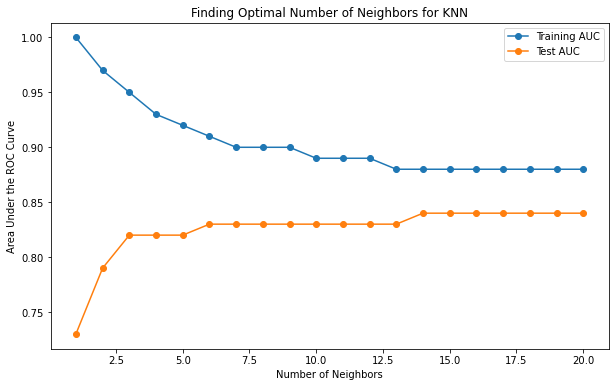

In [77]:
# Visualize the results
plt.figure(figsize = (10,6))
plt.title("Finding Optimal Number of Neighbors for KNN")
plt.plot(neighbors, train_auc.values(), label = 'Training AUC', marker = 'o')
plt.plot(neighbors, test_auc.values(), label = 'Test AUC', marker = 'o')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Area Under the ROC Curve")
plt.show()

The optimal number of neighbors produces a test AUC around 0.84

In [78]:
# N Neighbors = 14 produces AUC = 0.84. After that there is no change in auc with higher n
test_auc.values()

dict_values([0.73, 0.79, 0.82, 0.82, 0.82, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84])